<a href="https://colab.research.google.com/github/BHAVYA-3806/Sampling-Techniques-Model-Evaluation/blob/main/102203806_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!pip install imbalanced-learn scikit-learn pandas matplotlib seaborn
!pip install catboost lightgbm


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


In [37]:
# Load the dataset
data = pd.read_csv('Creditcard_data.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [38]:
# Splitting features and target
target_column = 'Class'
X = data.drop(target_column, axis=1)  # Replace 'target_column' with the actual target column name
y = data[target_column]


In [39]:
sampling_methods = {
    "Random Undersampler": RandomUnderSampler(random_state=42, replacement=True),
    "Random Oversampler": RandomOverSampler(random_state=42),
    "Tomek Links": TomekLinks(),
    "SMOTE": SMOTE(random_state=42),
    "NearMiss": NearMiss()
}
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5)
}

In [40]:
# Evaluate sampling and models
def evaluate_sampling_and_models(X, y, sampling_methods, models):
    results = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    for sampler_name, sampler in sampling_methods.items():
        try:
            X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
            for model_name, model in models.items():
                model.fit(X_resampled, y_resampled)
                y_pred = model.predict(X_test)
                accuracy = accuracy_score(y_test, y_pred)
                results.append({"Sampling": sampler_name, "Model": model_name, "Accuracy": accuracy})
        except Exception as e:
            print(f"Error with {sampler_name} and {model_name}: {e}")
            results.append({"Sampling": sampler_name, "Model": model_name, "Accuracy": None})
    return pd.DataFrame(results)

In [41]:
# Run evaluation
results_df = evaluate_sampling_and_models(X, y, sampling_methods, models)
print(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

               Sampling                      Model  Accuracy
0   Random Undersampler        Logistic Regression  0.797414
1   Random Undersampler              Decision Tree  0.495690
2   Random Undersampler              Random Forest  0.556034
3   Random Undersampler                   CatBoost  0.512931
4   Random Undersampler  K-Nearest Neighbors (KNN)  0.775862
5    Random Oversampler        Logistic Regression  0.926724
6    Random Oversampler              Decision Tree  0.965517
7    Random Oversampler              Random Forest  0.987069
8    Random Oversampler                   CatBoost  0.969828
9    Random Oversampler  K-Nearest Neighbors (KNN)  0.978448
10          Tomek Links        Logistic Regression  0.982759
11          Tomek Links              Decision Tree  0.987069
12          Tomek Links              Random Forest  0.987069
13          Tomek Links                   CatBoost  0.987069
14          Tomek Links  K-Nearest Neighbors (KNN)  0.987069
15                SMOTE 

In [42]:

def visualize_results(results_df):
    plt.figure(figsize=(12, 8))
    sns.barplot(data=results_df, x="Sampling", y="Accuracy", hue="Model")
    plt.title("Model Accuracy by Sampling Technique")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


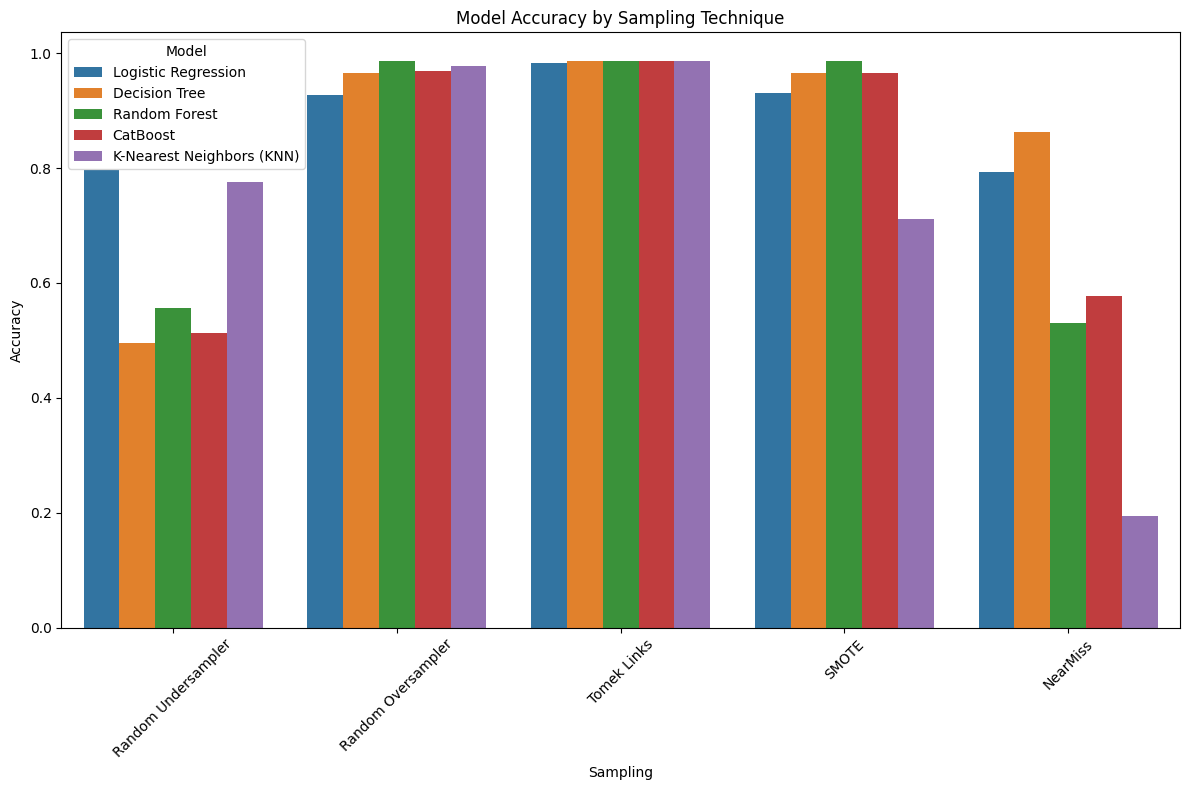

In [43]:
# Visualize results

visualize_results(results_df)